In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import accuracy_score
from scipy.stats import gaussian_kde
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.feature_selection import SelectFromModel

## Objective

<blockquote> 
Use a decision tree model to predict customer churn (the percentage of customers that stopped using a company’s product or service during a certain time frame).
    
<blockquote>

## Why is Churn Rate important

<blockquote>
With subsctiption based businesses, customer retention is important, as it directly affects the profitability, it has a impact on how a business grows, whether customers are moving to nearest competitor. So this will have an influence on whether the business is growing, the rate they are losing or gaining customers is a great focus for businesses.
</blockquote>

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

## The Data

<blockquote>
We have a Data set of 7043 customers, which consist of 21 rows, including customerID, gender, SeniorCitizen, Partner, Dependents,tenure, PhoneService, MultipleLines, InternetService,OnlineSecurity', OnlineBackup, DeviceProtection, TechSupport,StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges and the Churn. We want to further investigate as to which of these features affects the rate at which customers churn, the insights gained will attempt to descrease the churn rate and help the business focus on key areas to imporve business processes.
</blockquote>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [6]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', 0.0)
df.astype({'TotalCharges': 'float64'}).dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

## Values

<blockquote>
<b>Numerical Values -</b> Included within the numerical values were the Tenure,Monthly Charges, Senior Citizenship. In order to investigate the Skewness, which showed that the distribution of Senior Citizens was not symmetrical, the Kurtosis helped us determine whether the distribuiton was very narrow of peaked. 
    
</blockquote>

In [7]:
data_summary = df.describe()
data_summary.loc['skewness'] = df.skew()
data_summary.loc['kurtosis'] = df.kurtosis()
data_summary

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000
skewness,1.833633,0.239540,-0.220524
kurtosis,1.362596,-1.387372,-1.257260


In [8]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', 0.0)
df.astype({'TotalCharges': 'float64'}).dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

## Exploratory Data Analysis

## Churned Customers

<blockquote>
Out of the 7043 Customers, there were 1869 customers who churned, this is a loss of over 26% of the customer base.
</blockquote>



No     5174
Yes    1869
Name: Churn, dtype: int64


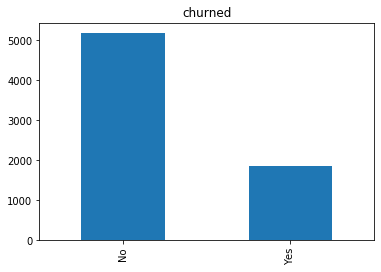

In [9]:
df.Churn.value_counts().plot('bar').set_title('churned')
print(df.Churn.value_counts())

In [10]:
## Exploratory Data Analysis

In [11]:
data = pd.get_dummies(df, columns=['Churn'])

## Taking into consideration the numerical values we have which exlcuded the Senioriy, We found that customers are more likely to churn in the early months of the subscription, this rate descreases as more months are added to their tenure, it is also observed that customers who pay between the mean and the maximum have a higher churn rate. 

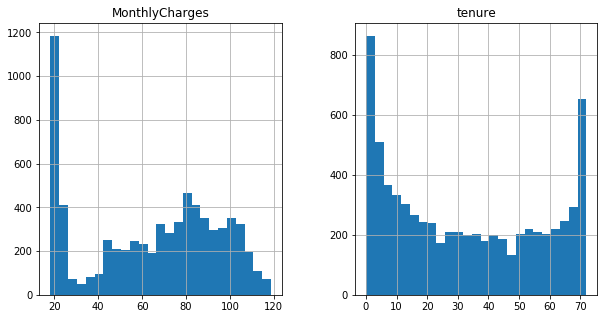

In [12]:
series = ['tenure', 'MonthlyCharges']
data[series].hist(bins=25, figsize=(10, 5))
plt.show()

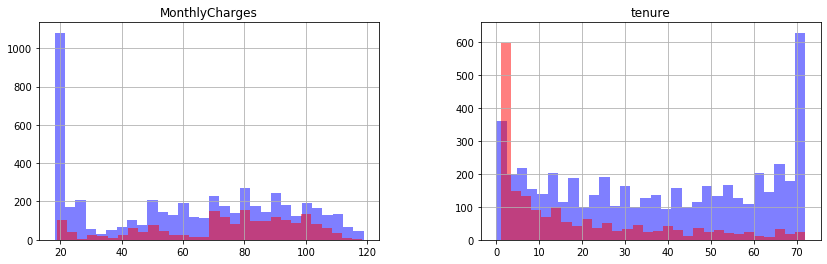

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
df[df.Churn == "No"][series].hist(bins=30, color="blue", alpha=0.5, ax=ax)
df[df.Churn == "Yes"][series].hist(bins=30, color="red", alpha=0.5, ax=ax)
plt.show()

## Taking a closer look at the Tenure and Monthly charges, there are no outliers that might affect our data for predcition analysis.

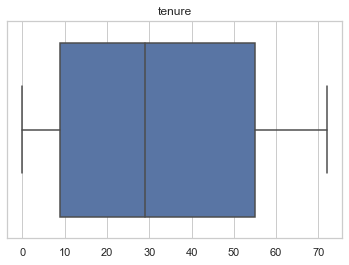

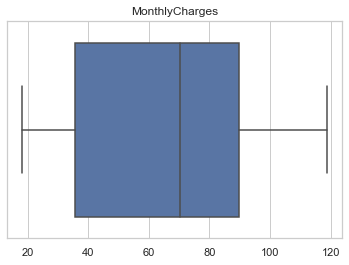

In [14]:
for i in series:
    sns.set(style="whitegrid")
    ax = sns.boxplot(data= data, x=[i])
    plt.title(i)
    plt.show()

## Senior Citizens were more like to cancel their subscription. Customers who had Fibre Optic were more likely churn than those who had DSL, Customers who had no internet security, no Online Backup and customers who were on a month to month basis were more likely to cancel their subscriptions.

In [15]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

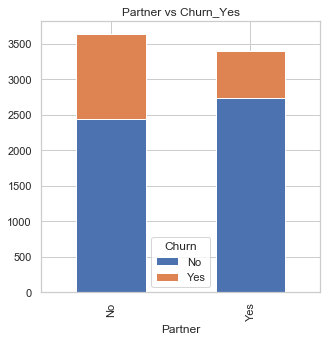

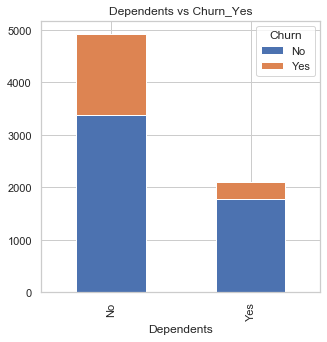

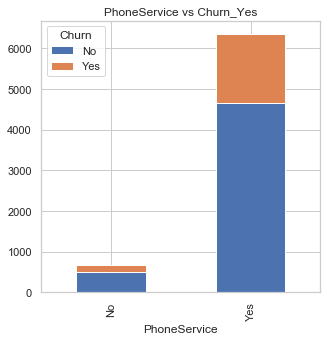

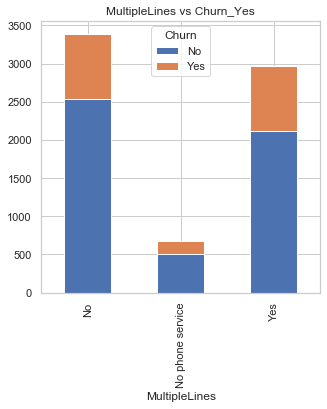

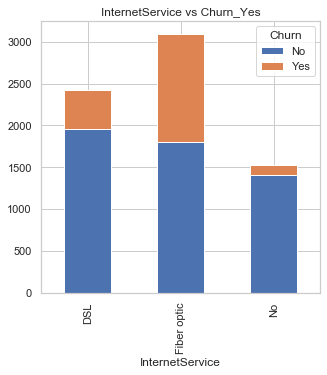

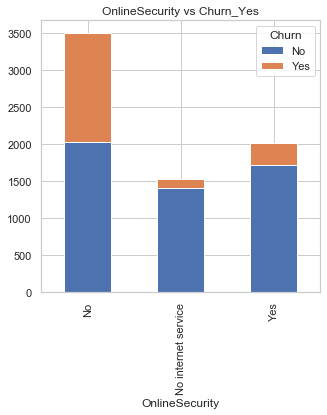

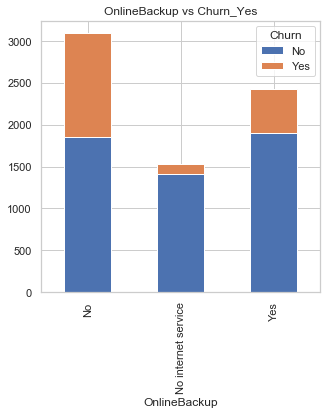

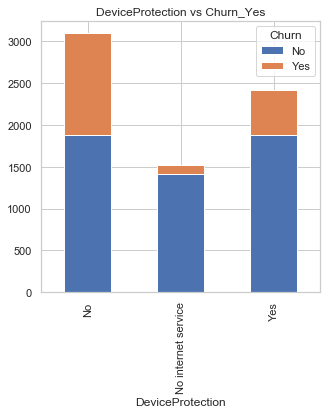

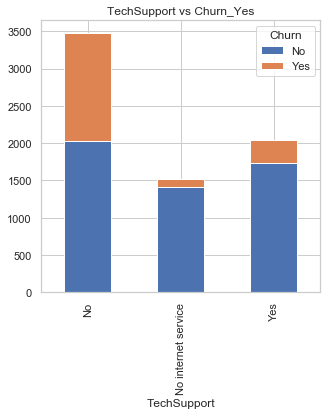

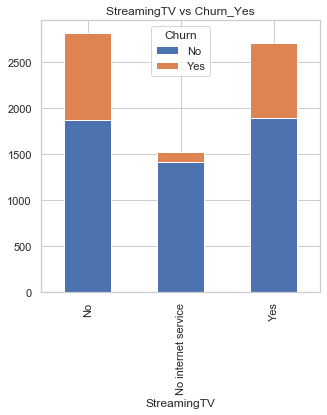

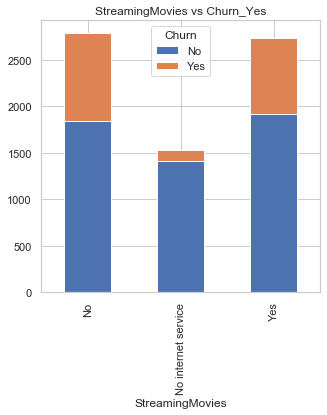

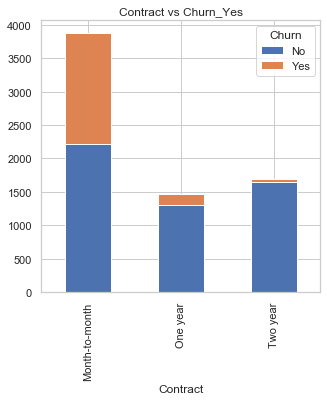

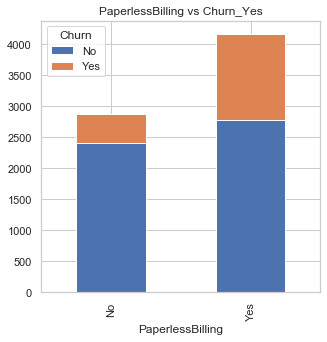

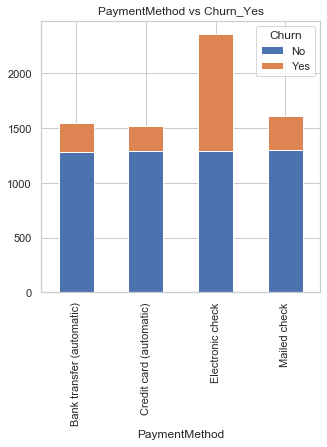

In [16]:
lst = [ 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']

for i in lst:
    df.groupby([i, "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5))
    plt.title('{} vs Churn_Yes'.format(i))
    plt.show()

## We observed that the there was a high correlation between the customer churning and Monthly Charges, Senior Citizenship, their contract and internet services. This gave a impression that the tenure was higly correlated to the customer not churning.

In [17]:

new_data = pd.get_dummies(df, columns=['InternetService', 'OnlineSecurity', 'OnlineBackup', 
                                       'PaymentMethod','Contract', 'PaperlessBilling','Churn'])

In [18]:
# new_data['PhoneService'] = new_data['PhoneService'].map({'Yes':1,'No':0})
# new_data['MultipleLines'] = new_data['MultipleLines'].map({'Yes':1,'No':0, 'No phone service':2})
# new_data['StreamingTV'] = new_data['StreamingTV'].map({'Yes':1,'No':0, 'No internet service':2})
# new_data['StreamingMovies'] = new_data['StreamingMovies'].map({'Yes':1,'No':0, 'No internet service':2})


In [19]:
new_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,DeviceProtection,TechSupport,...,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,Churn_No,Churn_Yes
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,No,No,...,0,1,0,1,0,0,0,1,1,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,Yes,No,...,0,0,1,0,1,0,1,0,1,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,No,No,...,0,0,1,1,0,0,0,1,0,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,Yes,Yes,...,0,0,0,0,1,0,1,0,1,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,No,No,...,0,1,0,1,0,0,0,1,0,1


In [20]:
new_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'MonthlyCharges',
       'TotalCharges', 'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_No', 'PaperlessBilling_Yes', 'Churn_No', 'Churn_Yes'],
      dtype='object')

## First Model

In [21]:
exclude = ['customerID', 'gender', 'Partner', 'Dependents','SeniorCitizen',
           'DeviceProtection', 'TechSupport','StreamingTV','StreamingMovies',
           'Churn_No','Churn_Yes','MultipleLines','PhoneService',
          'Contract_One year', 'Contract_Two year']

In [22]:
X = new_data.drop(exclude, axis=1)
y = new_data.iloc[:, -1:]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Instantiate
## A decision tree classifier was used, the criterion being entropy level, the max depth that was recommended upon experimentaion was 4. Since the Churn Rate was binary, it was either the customer churns or not, the classifier was chosen over the regressor. 

In [24]:
dt = DecisionTreeClassifier(max_depth=4,random_state = 1, criterion='entropy')

## Fit

In [25]:
clf = dt.fit(X_train, y_train)

## Predict

In [26]:
y_pred = dt.predict(X_test)

## MSE 

In [27]:
mse_dt = MSE(y_test, y_pred)
mse_dt

0.2025556081400852

## Accuracy 

In [28]:
score = accuracy_score(y_test, y_pred) 
print('The Score is %6.4f' % accuracy_score(y_test, y_pred))

The Score is 0.7974


In [29]:
print('The accuracy on training set is %6.4f' % clf.score(X_train,y_train))
print('The accuracy on testing set is %6.4f' %clf.score(X_test, y_test))

The accuracy on training set is 0.7937
The accuracy on testing set is 0.7974


In [30]:
import os

os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\bin'

## Tree 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


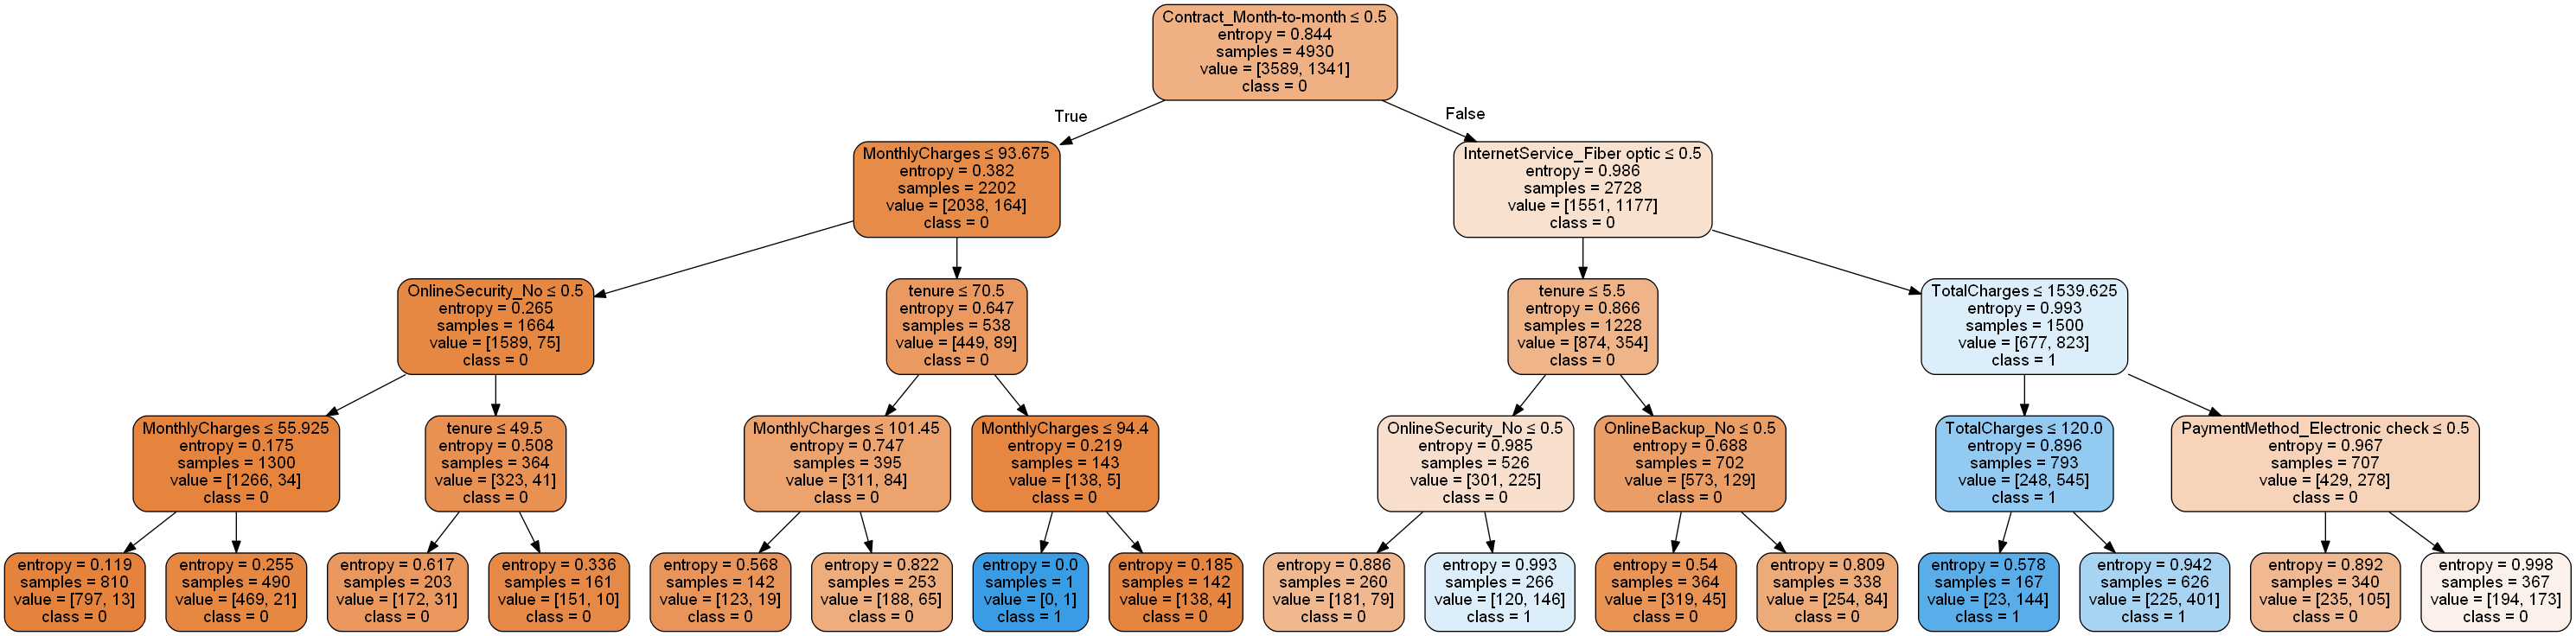

In [31]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('churnes.png')
Image(graph.create_png())

## From our confusion matrix we are able to observe that there are 1435 True Positves, 150 False positives, 264 False Negatives, 264 True negatives. Our model has properly classified a majority of  our cases. 

In [32]:
print(confusion_matrix(y_test, y_pred))

[[1413  172]
 [ 256  272]]


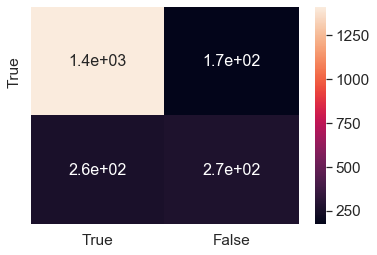

In [44]:
array = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(array, range(2), range(2))
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},yticklabels={'True',''},xticklabels={'False','True'}) # font size
sns.barplot()
plt.show()

In [47]:
array = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(array,columns={'True','False'},index={'Positive','Negative'})
df_cm

,True,False
Negative,1413,172
Positive,256,272


In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1585
           1       0.61      0.52      0.56       528

    accuracy                           0.80      2113
   macro avg       0.73      0.70      0.71      2113
weighted avg       0.79      0.80      0.79      2113



In [35]:
model = SelectFromModel(dt, prefit=True)
X_new = model.transform(X)
X_new.shape

(7043, 5)

In [36]:
dict = {'feature': X.columns, 'feature_importance':dt.feature_importances_}
new_df = pd.DataFrame(dict)
new_df.sort_values('feature_importance',axis=0,ascending=False,inplace=True)
features = [x for x in new_df['feature']]
features

['Contract_Month-to-month',
 'InternetService_Fiber optic',
 'TotalCharges',
 'tenure',
 'MonthlyCharges',
 'OnlineSecurity_No',
 'PaymentMethod_Electronic check',
 'OnlineBackup_No',
 'OnlineSecurity_Yes',
 'OnlineSecurity_No internet service',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'InternetService_No',
 'PaymentMethod_Mailed check',
 'InternetService_DSL',
 'PaperlessBilling_No',
 'PaperlessBilling_Yes']

In [37]:
new_df

,feature,feature_importance
16,Contract_Month-to-month,0.558554
4,InternetService_Fiber optic,0.121656
2,TotalCharges,0.106276
0,tenure,0.080265
1,MonthlyCharges,0.062150
6,OnlineSecurity_No,0.046716
14,PaymentMethod_Electronic check,0.012605
9,OnlineBackup_No,0.011778
8,OnlineSecurity_Yes,0.000000
7,OnlineSecurity_No internet service,0.000000


## Second Model

In [38]:
exclude = ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'InternetService_DSL', 'InternetService_No',
       'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
        'Contract_One year', 'Contract_Two year','Churn_No', 'Churn_Yes']